In [2]:
#importing libraries
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")


In [3]:
# Getting a list of all CSV files starting with "AQI" in the current directory
csv_files=glob.glob("AQI**.csv")
#creating an empty list to stor all the dataframes 
all_dfs=[]
#loop through each csv files 
for one_file in csv_files :
    #Reading the CSV file and creating a DataFrame
    new_df=pd.read_csv(one_file)
    #appending the dataframe to the list created
    all_dfs.append(new_df)


In [4]:
# Concatenating all DataFrames in the 'all_dfs' list into a single DataFrame
#ignore the original indices of the dataframes and creating a new index
AQI_df=pd.concat(all_dfs,ignore_index=True)
AQI_df

,City,PM25,NO2,PM10,AQI_PM25,AQI_NO2,AQI_PM10,AQI_MAX,datetimeUtc
0,Cyprus,8.3,19.0,17.0,35,18,16,35,2024-02-02T18:00:00+00:00
1,Cyprus,11.0,16.0,18.0,46,16,17,46,2024-02-02T19:00:00+00:00
2,Cyprus,15.0,7.7,20.0,58,8,19,58,2024-02-02T20:00:00+00:00
3,Cyprus,7.9,11.0,11.0,33,11,11,33,2024-02-02T21:00:00+00:00
4,Cyprus,13.0,8.1,16.0,54,8,15,54,2024-02-02T22:00:00+00:00
...,...,...,...,...,...,...,...,...,...
3460,Wrexham,7.0,9.0,7.0,30,9,7,30,2024-02-28T20:00:00+00:00
3461,Wrexham,6.0,2.0,7.0,25,2,7,25,2024-02-28T21:00:00+00:00
3462,Wrexham,6.0,2.0,7.0,25,2,7,25,2024-02-28T22:00:00+00:00
3463,Wrexham,6.0,8.0,7.0,25,8,7,25,2024-02-28T23:00:00+00:00


In [5]:
#Displaying concise summary of the DataFrame AQI_df
#provides index, column data types, non-null counts, and memory usage
AQI_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3465 entries, 0 to 3464
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         3465 non-null   object 
 1   PM25         3465 non-null   float64
 2   NO2          3465 non-null   float64
 3   PM10         3465 non-null   float64
 4   AQI_PM25     3465 non-null   int64  
 5   AQI_NO2      3465 non-null   int64  
 6   AQI_PM10     3465 non-null   int64  
 7   AQI_MAX      3465 non-null   int64  
 8   datetimeUtc  3465 non-null   object 
dtypes: float64(3), int64(4), object(2)
memory usage: 243.8+ KB


In [6]:
# Print the number of missing values (null values) in each column
print(AQI_df.isnull().sum())
#Drop rows with any missing values and return the DataFrame without those rows
AQI_df.dropna()

City           0
PM25           0
NO2            0
PM10           0
AQI_PM25       0
AQI_NO2        0
AQI_PM10       0
AQI_MAX        0
datetimeUtc    0
dtype: int64


,City,PM25,NO2,PM10,AQI_PM25,AQI_NO2,AQI_PM10,AQI_MAX,datetimeUtc
0,Cyprus,8.3,19.0,17.0,35,18,16,35,2024-02-02T18:00:00+00:00
1,Cyprus,11.0,16.0,18.0,46,16,17,46,2024-02-02T19:00:00+00:00
2,Cyprus,15.0,7.7,20.0,58,8,19,58,2024-02-02T20:00:00+00:00
3,Cyprus,7.9,11.0,11.0,33,11,11,33,2024-02-02T21:00:00+00:00
4,Cyprus,13.0,8.1,16.0,54,8,15,54,2024-02-02T22:00:00+00:00
...,...,...,...,...,...,...,...,...,...
3460,Wrexham,7.0,9.0,7.0,30,9,7,30,2024-02-28T20:00:00+00:00
3461,Wrexham,6.0,2.0,7.0,25,2,7,25,2024-02-28T21:00:00+00:00
3462,Wrexham,6.0,2.0,7.0,25,2,7,25,2024-02-28T22:00:00+00:00
3463,Wrexham,6.0,8.0,7.0,25,8,7,25,2024-02-28T23:00:00+00:00


In [7]:
# Count the number of duplicated rows in the DataFrame AQI_df
AQI_df.duplicated().sum()

1

In [8]:
#Drop duplicated rows and return the dataframe without those rows
AQI_df=AQI_df.drop_duplicates()
AQI_df

,City,PM25,NO2,PM10,AQI_PM25,AQI_NO2,AQI_PM10,AQI_MAX,datetimeUtc
0,Cyprus,8.3,19.0,17.0,35,18,16,35,2024-02-02T18:00:00+00:00
1,Cyprus,11.0,16.0,18.0,46,16,17,46,2024-02-02T19:00:00+00:00
2,Cyprus,15.0,7.7,20.0,58,8,19,58,2024-02-02T20:00:00+00:00
3,Cyprus,7.9,11.0,11.0,33,11,11,33,2024-02-02T21:00:00+00:00
4,Cyprus,13.0,8.1,16.0,54,8,15,54,2024-02-02T22:00:00+00:00
...,...,...,...,...,...,...,...,...,...
3460,Wrexham,7.0,9.0,7.0,30,9,7,30,2024-02-28T20:00:00+00:00
3461,Wrexham,6.0,2.0,7.0,25,2,7,25,2024-02-28T21:00:00+00:00
3462,Wrexham,6.0,2.0,7.0,25,2,7,25,2024-02-28T22:00:00+00:00
3463,Wrexham,6.0,8.0,7.0,25,8,7,25,2024-02-28T23:00:00+00:00


In [9]:
# Converting the 'datetimeUtc' column to datetime format
AQI_df['datetimeUtc']=pd.to_datetime(AQI_df['datetimeUtc'])
AQI_df

,City,PM25,NO2,PM10,AQI_PM25,AQI_NO2,AQI_PM10,AQI_MAX,datetimeUtc
0,Cyprus,8.3,19.0,17.0,35,18,16,35,2024-02-02 18:00:00+00:00
1,Cyprus,11.0,16.0,18.0,46,16,17,46,2024-02-02 19:00:00+00:00
2,Cyprus,15.0,7.7,20.0,58,8,19,58,2024-02-02 20:00:00+00:00
3,Cyprus,7.9,11.0,11.0,33,11,11,33,2024-02-02 21:00:00+00:00
4,Cyprus,13.0,8.1,16.0,54,8,15,54,2024-02-02 22:00:00+00:00
...,...,...,...,...,...,...,...,...,...
3460,Wrexham,7.0,9.0,7.0,30,9,7,30,2024-02-28 20:00:00+00:00
3461,Wrexham,6.0,2.0,7.0,25,2,7,25,2024-02-28 21:00:00+00:00
3462,Wrexham,6.0,2.0,7.0,25,2,7,25,2024-02-28 22:00:00+00:00
3463,Wrexham,6.0,8.0,7.0,25,8,7,25,2024-02-28 23:00:00+00:00


In [10]:
#Defining a list of columns to be used for grouping and aggregation
num=["PM25","NO2","PM10","AQI_PM25","AQI_NO2","AQI_PM10","AQI_MAX"]
# Grouping the DataFrame by the 'City' column
#calculating the mean for the specified columns
df_grouped=AQI_df.groupby("City")[num].mean()
df_grouped

,PM25,NO2,PM10,AQI_PM25,AQI_NO2,AQI_PM10,AQI_MAX
City,,,,,,,
Cyprus,9.480340,10.447952,18.801024,36.552901,10.382253,17.732082,37.853242
Gera Friedericistr.,5.789432,12.824853,9.288258,23.870841,12.632094,9.093933,25.121331
Nairobi,12.611486,0.006640,27.535811,48.081081,1.000000,25.707770,48.081081
Vangsvegen-Disen,18.261512,36.583591,19.951667,62.627148,35.694158,18.845361,62.773196
Wrexham,5.206169,5.194805,8.258117,22.102273,5.194805,8.136364,22.288961
dairy rosemount,10.814558,9.859619,14.812825,42.771231,9.637782,14.289428,43.249567


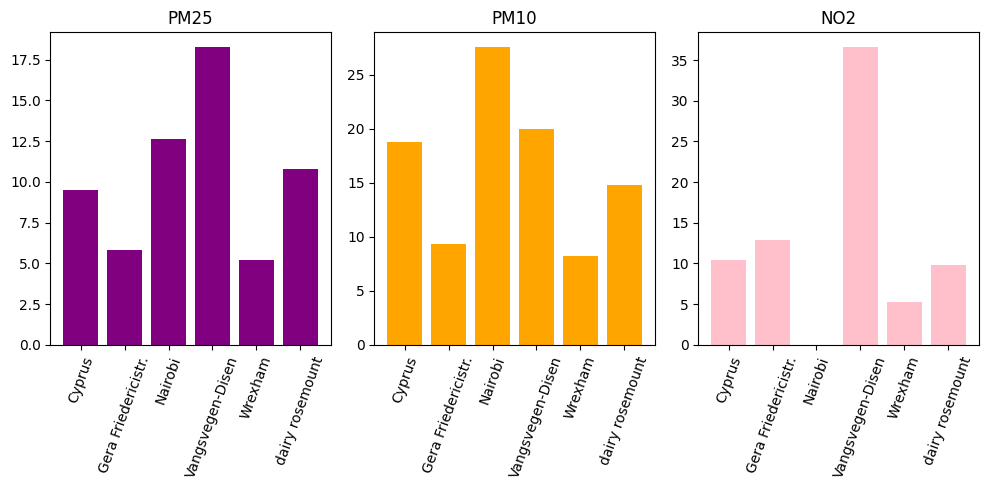

In [11]:
#Plotting a bar graph that shows pollutants concentration in each city

# Reset the index of the DataFrame 
a = df_grouped.reset_index()
# Create subplots with 1 row and 3 columns
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
# List of colors for each parameter
colors = ["purple", "orange", "pink"]
# List of parameter names
params = ["PM25", "PM10", "NO2"]
# Iterate over the columns and plot each parameter
for i, param in enumerate(params):
    ax[i].bar(a["City"], a[param], color=colors[i])
    ax[i].set_title(param)
    ax[i].tick_params("x",rotation=70)

# Adjust layout to prevent overlap of titles
plt.tight_layout()

# Display the plots
plt.show()

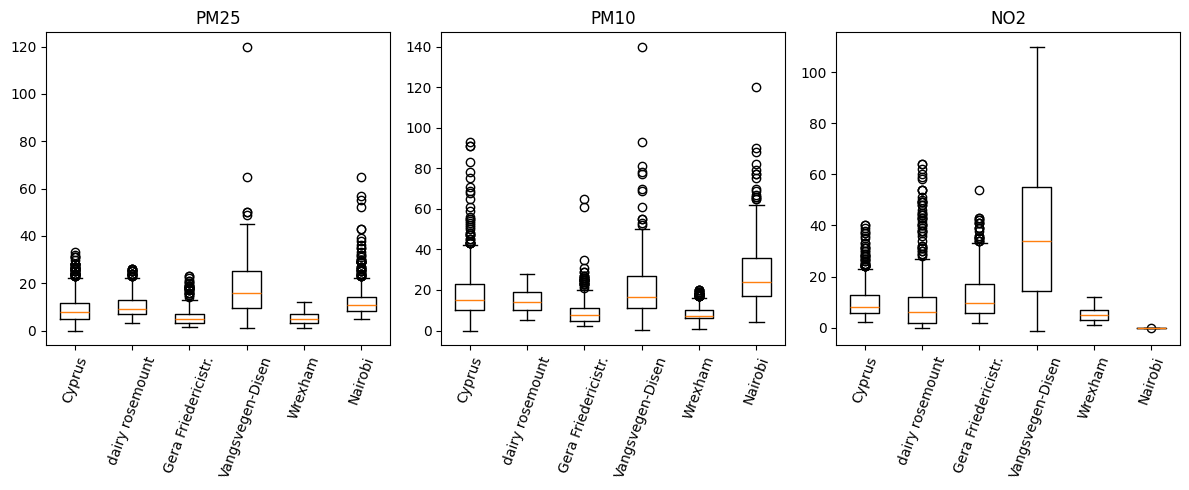

In [12]:
#boxplot displying a five number summary of each pollutant for each city

# Create subplots with 1 row and 3 columns, and set the figure size
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))
# List of city names
city_name = ["Cyprus", "dairy rosemount", "Gera Friedericistr.", "Vangsvegen-Disen", "Wrexham", "Nairobi"]
# List of parameters to plot
params = ["PM25", "PM10", "NO2"]
# Iterate over each parameter
for i, param in enumerate(params):
    # Extract parameter data for each city
    data = [AQI_df[AQI_df["City"] == city][param] for city in city_name]
    # Plot boxplots for the parameter data
    ax[i].boxplot(data)
    # Set x-axis labels with city names and rotate them for better readability
    ax[i].set_xticklabels(city_name, rotation=70)
    # Set title for the subplot
    ax[i].set_title(param)
# Adjust layout to prevent overlap of titles
plt.tight_layout()
# Display the plots
plt.show()

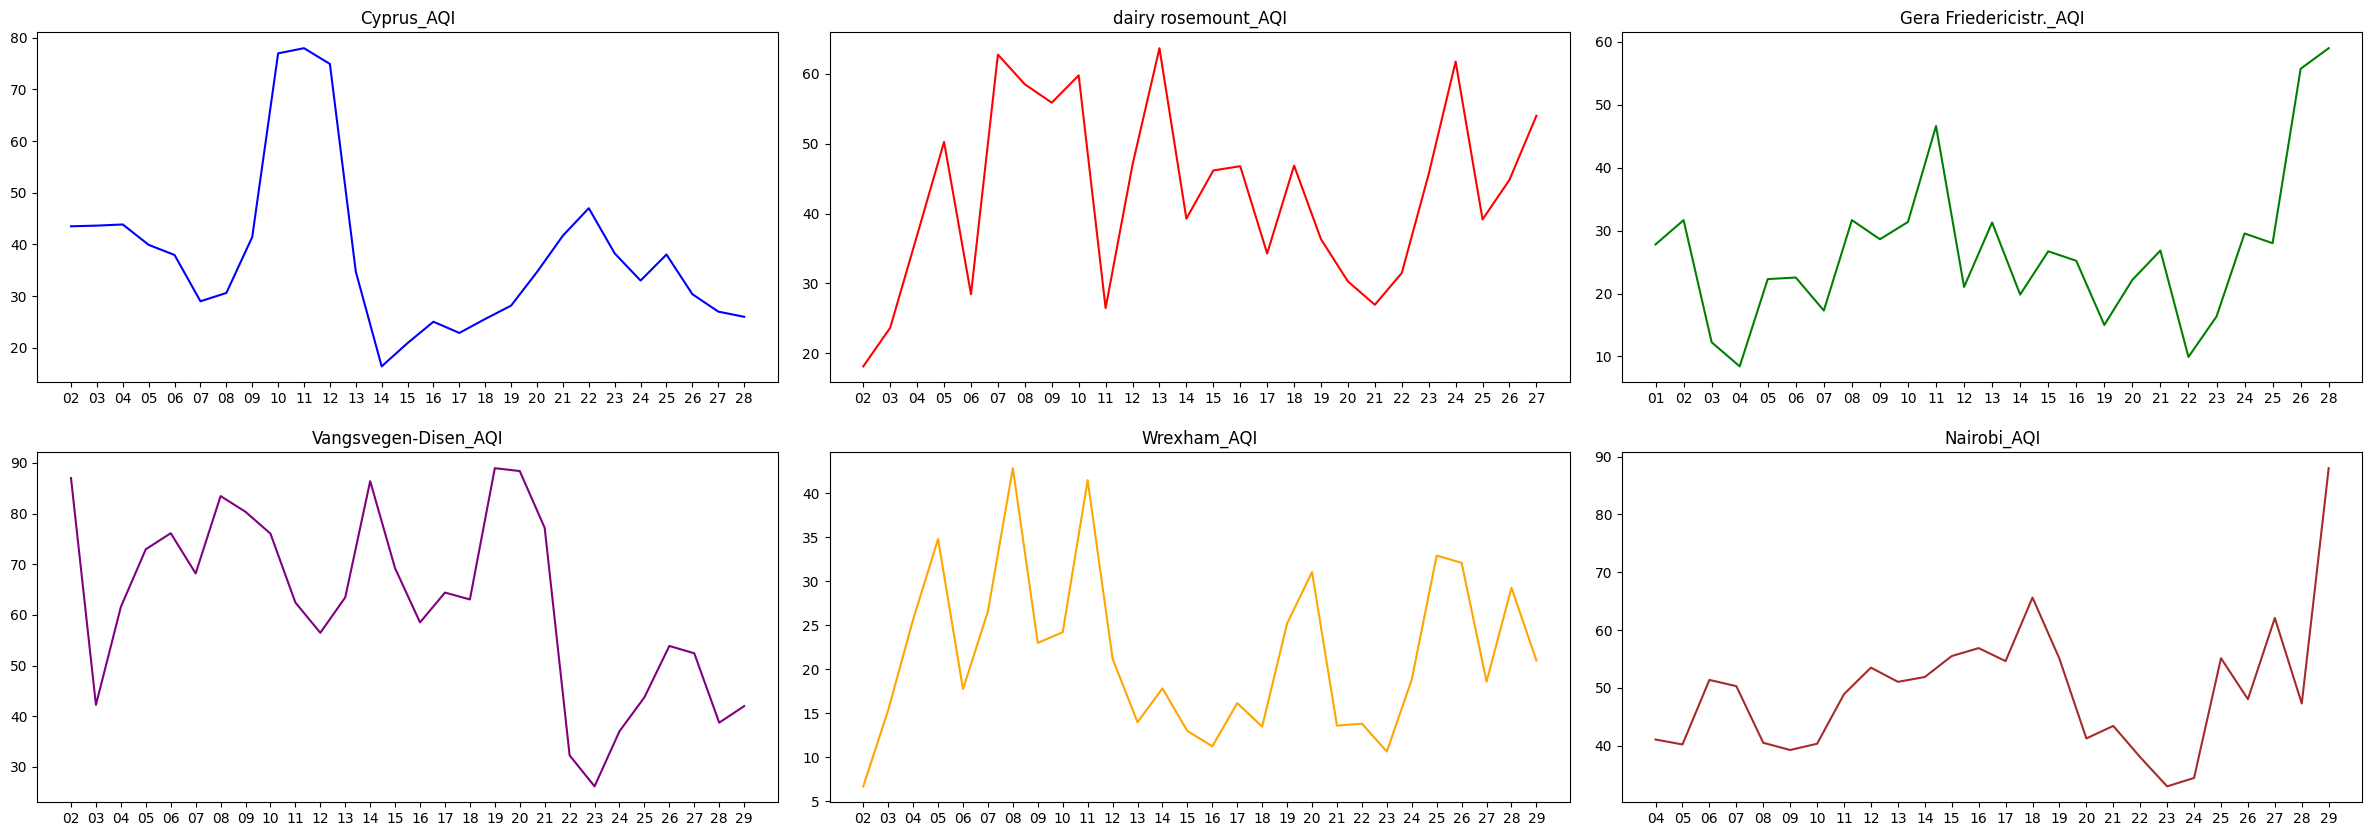

In [13]:
#AQI time analysis for each city

fig, ax = plt.subplots(2, 3, figsize=(30, 10))
plt.subplots_adjust(wspace=0.07)

# Define a function to plot AQI data per day for each city
def plot_aqi_per_day(city_df, ax, color):
    city_df["Day"] = city_df["datetimeUtc"].dt.strftime('%d')
    city_per_day = city_df.groupby("Day")["AQI_MAX"].agg("mean")
    ax.plot(city_per_day, color=color)
    ax.set_title(f"{city_df['City'].iloc[0]}_AQI")

# List of cities and corresponding dataframes
Cyprus=AQI_df[AQI_df["City"]=="Cyprus"]
D_R=AQI_df[AQI_df["City"]=="dairy rosemount"]
G_F=AQI_df[AQI_df["City"]=="Gera Friedericistr."]
Van=AQI_df[AQI_df["City"]=="Vangsvegen-Disen"]
Wre=AQI_df[AQI_df["City"]=="Wrexham"]
Nai=AQI_df[AQI_df["City"]=="Nairobi"]
cities_data=[(Cyprus,"blue"),(D_R,"red"),(G_F,"green"),(Van,"purple"),(Wre,"orange"),(Nai,"brown")]

# Iterate over cities and plot AQI per day
for i, (city_df, color) in enumerate(cities_data):
    plot_aqi_per_day(city_df, ax[i//3, i%3], color)

plt.show()

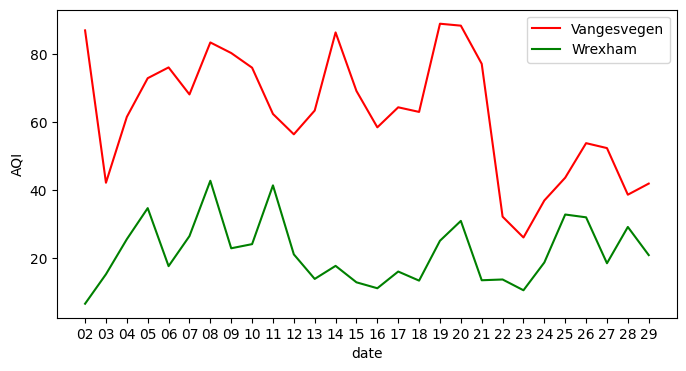

In [14]:
#Comparing cities with the lowest and highest AQI

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(8, 4))
# Plot Vangesvegen's AQI data with a red line
V_per_day =Van.groupby("Day")["AQI_MAX"].agg("mean")
ax.plot(V_per_day, color="red", label="Vangesvegen")
# Plot Wrexham's AQI data with a green line
Wrexham_per_day =Wre.groupby("Day")["AQI_MAX"].agg("mean")
ax.plot(Wrexham_per_day, color="green", label="Wrexham")
# Add a legend to the plot to distinguish between the two lines
ax.legend()
# Set label for x-axis
ax.set_xlabel("date")
# Set label for y-axis
ax.set_ylabel("AQI")
# Display the plot
plt.show()



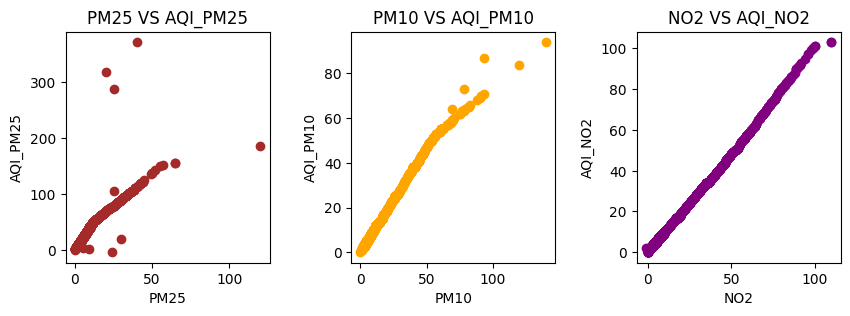

In [15]:
#Scatter plot of pollutants' concentration and the respective AQI 

# Define parameters and corresponding colors
params = ["PM25", "PM10", "NO2"]
colors = ["brown", "orange", "purple"]

# Create subplots with 1 row and 3 columns
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

# Adjust horizontal space between subplots
plt.subplots_adjust(wspace=0.4)

# Iterate over parameters and plot each scatter plot
for i, param in enumerate(params):
    ax[i].scatter(AQI_df[param], AQI_df[f"AQI_{param}"], color=colors[i])
    ax[i].set_title(f"{param} VS AQI_{param}")
    ax[i].set_xlabel(param)
    ax[i].set_ylabel(f"AQI_{param}")

# Display the plot
plt.show()

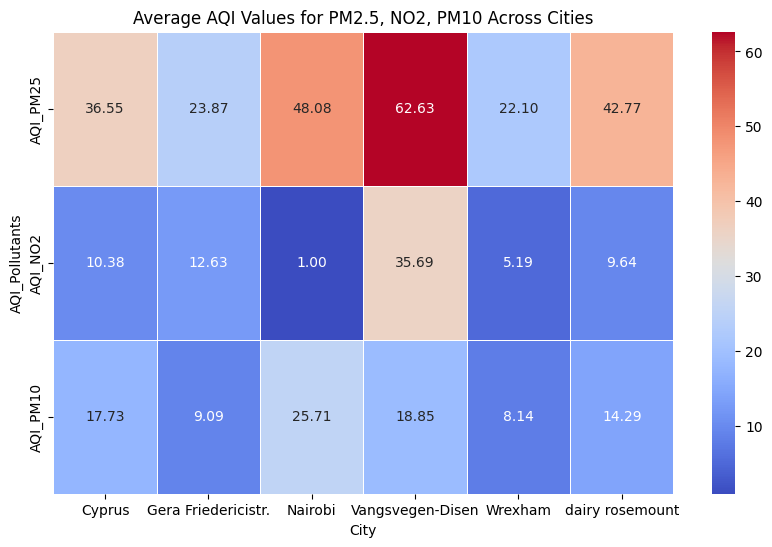

In [16]:
#Heat map of average AQI for pollutants across cities 

# Grouping the DataFrame AQI_df by 'City' and calculating the mean for AQI_PM25, AQI_NO2, and AQI_PM10
avg_aqi = AQI_df.groupby('City').mean()[['AQI_PM25', 'AQI_NO2', 'AQI_PM10']]
# Transposing the DataFrame to have cities as rows and AQI_pollutants as columns
avg_aqi = avg_aqi.T  
# Creating a new figure with a size of 10x6 inches
plt.figure(figsize=(10, 6))  
# Creating a heatmap using seaborn's heatmap function
sns.heatmap(avg_aqi, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)  
# Adding a title to the plot
plt.title('Average AQI Values for PM2.5, NO2, PM10 Across Cities')  
# Adding a label to the x-axis
plt.xlabel('City')  
# Adding a label to the y-axis
plt.ylabel('AQI_Pollutants')  
# Displaying the plot
plt.show()

In [17]:
#Interacrive bar chart comparing AQI across cities

# Importing the Plotly Express library as px
import plotly.express as px  
# Defining a list of columns to use as hover data
hover = ["AQI_PM25", "AQI_PM10", "AQI_NO2", "AQI_MAX"]  
# Grouping data by city and calculating the mean for each hover column
city_AQI = AQI_df.groupby("City")[hover].agg("mean")  
# Resetting the index of the resulting DataFrame
city_AQI = city_AQI.reset_index() 
# Creating a bar chart using Plotly Express with city as x-axis, AQI_MAX as y-axis,
# hover data specified by the list hover, and color-coded by city
px.bar(city_AQI, x="City", y="AQI_MAX", hover_data=hover, title='AQI Statistics by City', color="City",width=800, height=600)


In [18]:
#Correlation among AQI values for each parameter

# Grouping data by city and calculating the mean for each hover column
hover = ["AQI_PM25", "AQI_PM10", "AQI_NO2", "AQI_MAX"]  
city_AQI = AQI_df.groupby("City")[hover].agg("mean")  
# Calculating the correlation matrix for the aggregated data
city_AQI.corr()  

,AQI_PM25,AQI_PM10,AQI_NO2,AQI_MAX
AQI_PM25,1.000000,0.758195,0.601700,0.999437
AQI_PM10,0.758195,1.000000,0.029897,0.757485
AQI_NO2,0.601700,0.029897,1.000000,0.610539
AQI_MAX,0.999437,0.757485,0.610539,1.000000


In [19]:
#Splitting the dataframe to training and testing sets

# Importing necessary module for splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

# Selecting features (independent variables) and target (dependent variable)
x = AQI_df[["PM25", "PM10", "NO2"]]  # Features
y = AQI_df["AQI_MAX"]  # Target

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=0)


In [20]:
#Building a Linear Regression model

# Importing LinearRegression class from sklearn.linear_model module
from sklearn.linear_model import LinearRegression

# Creating an instance of LinearRegression model
model = LinearRegression()

# Fitting the model on the training data
model.fit(x_train, y_train)

# Getting the intercept (b) and coefficients (m) of the linear regression model
#y=m1x1 + m2x2 + m3x3 + b
m = model.coef_
b = model.intercept_
print(m)
print(b)

[2.38267936 0.17346442 0.11795013]
10.895956480138093


In [21]:
# Predicting the target variable for the training data using the trained model
y_pred_train = model.predict(x_train)
y_pred_train

array([34.67517927, 85.11938036, 34.16100853, ..., 20.44873471,
       52.5488779 , 27.90400241])

Text(100, 200, 'AQI = 10.90 + 2.38 * PM25 + 0.17 * PM10 + 0.12 * NO2')

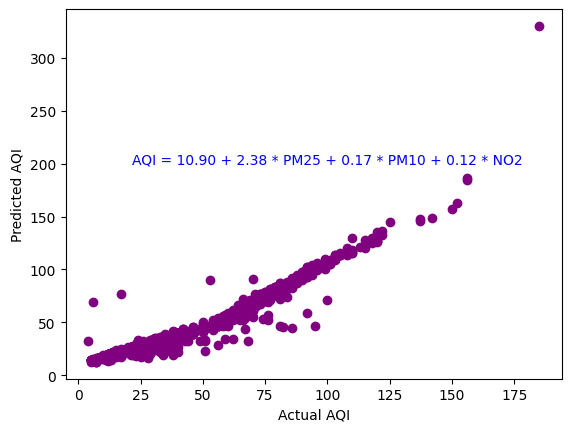

In [22]:
# Plotting the actual AQI values against the predicted AQI values for the training data
plt.scatter(y_train, y_pred_train, color="purple")
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
# Display linear regression formula
formula = f"AQI = {model.intercept_:.2f} + {model.coef_[0]:.2f} * PM25 + {model.coef_[1]:.2f} * PM10 + {model.coef_[2]:.2f} * NO2"
plt.text(100, 200, formula, fontsize=10, color='blue',ha="center")

In [23]:
# Calculating the R-squared score for the training data
from sklearn.metrics import r2_score
r2_score(y_train, y_pred_train)

0.9254228382637063

Text(0, 0.5, 'Predicted AQI')

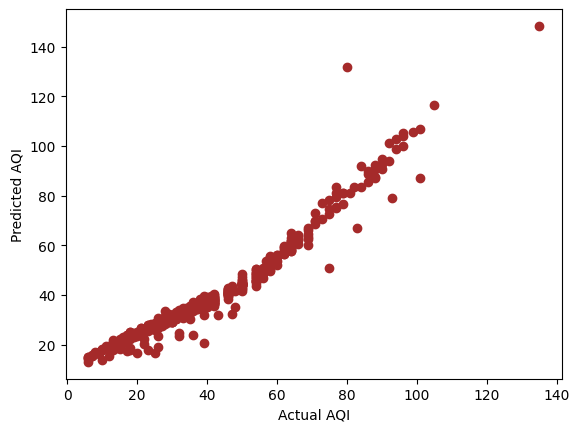

In [24]:
# Predicting AQI values for the test data using the trained model
y_pred_test = model.predict(x_test)

# Scatter plot comparing actual AQI values with predicted AQI values for the test data
plt.scatter(y_test, y_pred_test, color="brown")
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")

In [25]:
# Calculating the R-squared score for the test data
r2_score(y_test,y_pred_test)

0.9334111626563113

In [26]:
# Importing necessary libraries
from sklearn.model_selection import cross_val_score, KFold

# Creating a KFold object with 6 splits, shuffling the data,
# and setting a random seed for reproducibility
kf = KFold(n_splits=6, shuffle=True, random_state=42)

# Performing cross-validation and calculating R-squared scores for each fold
cv_results = cross_val_score(model, x, y, cv=kf)

# Printing the R-squared scores obtained from cross-validation
print(cv_results)
# Cross-validation assesses model performance by splitting data,
# training on subsets, and evaluating on others,
# yielding a more reliable performance estimate than a single train-test split.

[0.93973582 0.94858742 0.86509417 0.92405975 0.92503568 0.94901097]


In [27]:
#Calculate the mean of the cross-validation results
cv_rsq_mean = cv_results.mean()
cv_rsq_mean

0.9252539671157364

In [28]:
#giving concentrations of pollutants and predicting the AQI  
predict_AQI=[[10,25,10,]]
model.predict(predict_AQI)

array([40.2388619])